In [95]:
import implementation
import importlib
implementation = importlib.reload(implementation)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats

# Making some data

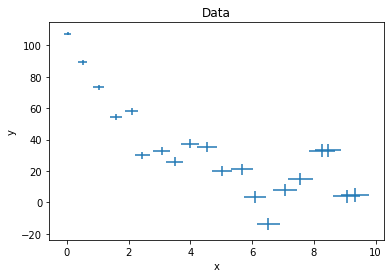

In [35]:
np.random.seed(0)
x = np.arange(0,10,.5)
y = 10+100*np.exp(-0.5*x)

xvar = .01+x/50
yvar = 1+2*x

x += np.random.normal(0,xvar,len(x))
y += np.random.normal(0,yvar,len(x))

sx=np.sqrt(xvar)
sy=np.sqrt(yvar)


plt.errorbar(x,y,xerr=sx,yerr=sy,linestyle="")
plt.title("Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



In [15]:
# Define a function to fit the data with.
def polynomial(p, x):
    a,b = p
    return a + b*x 

def exp_function(p, x):
    '''Calculate y at the time points xs'''
    a,b,c = p
    return a*np.exp(b*x)+c
    

# Fitting the ODR

In [36]:
fit1 = implementation.fit_odr(exp_function,x,y,[100,-0.5,10],sx,sy)
fit1.pprint()

Beta: [101.63095724  -0.42817447   7.38453251]
Beta Std Error: [11.42891601  0.11334591  6.70795111]
Beta Covariance: [[ 1.38143303e+01 -1.58226120e-02 -2.23704037e+00]
 [-1.58226120e-02  1.35872479e-03 -6.61925078e-02]
 [-2.23704037e+00 -6.61925078e-02  4.75882276e+00]]
Residual Variance: 9.455407429106813
Inverse Condition #: 0.10697831121786296
Reason(s) for Halting:
  Sum of squares convergence


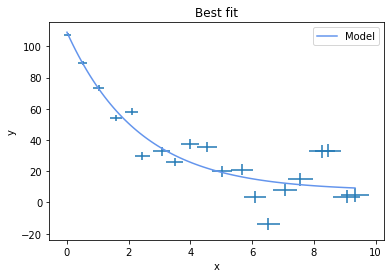

In [38]:
plt.errorbar(x,y,xerr=np.sqrt(xvar),yerr=np.sqrt(yvar),linestyle="")

xs = np.linspace(0,np.max(x),100)
ys = exp_function(fit1.beta, xs)
plt.plot(xs, ys, c="cornflowerblue", label="Model")
plt.title("Best fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

NormaltestResult(statistic=1.2494536755756003, pvalue=0.5354076616866883)


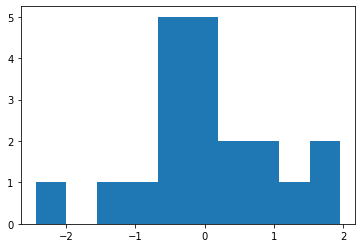

In [98]:
# Normalised Residuals
r = y - exp_function(fit1.beta, x)
r = r - np.mean(r)
r = r/np.std(r)
plt.hist(r)

print(sp.stats.normaltest(r))

# Bootstrapping the ODR

In [72]:
bs_params, bs_predictions = implementation.bs_odr(exp_function,x,y,[100,-0.5,10],sx,sy)

100%|████████████████████████████████| 100/100 [00:00<00:00, 656.97it/s]


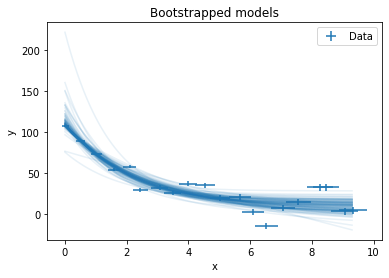

In [40]:
# Plot bootstrapped models
plt.errorbar(x, y, xerr=sx, yerr=sy, label="Data", linestyle="")
xs = np.arange(0,np.max(x),0.1)
for bs_param in bs_params:
    ys = exp_function(bs_param, xs)
    plt.plot(xs,ys, color="C0", alpha=.1)
plt.title("Bootstrapped models")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Parameter  0 114.70926568431081  +/-  83.90552275770864


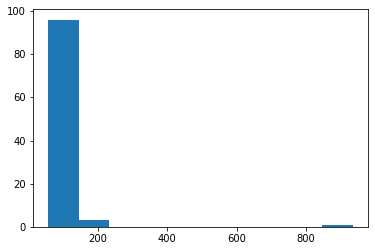

Parameter  1 -0.47506822798910947  +/-  0.1424279256079845


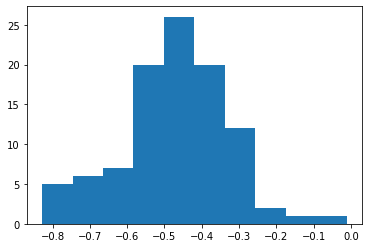

Parameter  2 -1.211419839140372  +/-  86.67758616849991


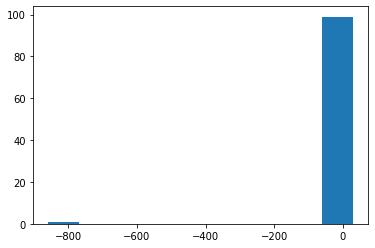

In [76]:
# Plot parameter estimate histograms
n_params = len(bs_params[0])
for i in range(n_params):
    estimates = [p[i] for p in bs_params]
    print("Parameter ", i, np.mean(estimates), " +/- ", np.std(estimates))
    plt.hist(estimates)
    plt.show()

2655.4086046612297
156.20050615654293


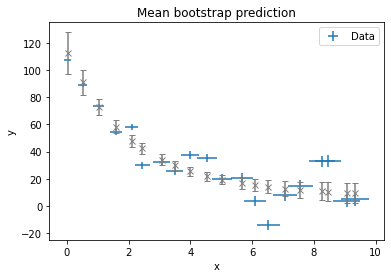

In [59]:
# Find bootstrap prediction for every x value and calculate SSE
plt.errorbar(x, y, xerr=sx, yerr=sy, label="Data", linestyle="")

SSE = 0
for i in range(len(x)):
    plt.errorbar(x[i], np.mean(bs_predictions[i]), yerr=np.std(bs_predictions[i]), \
                 c="0.5", marker="x", capsize=3)
    SSE += (y[i] - np.mean(bs_predictions[i]))**2
plt.title("Mean bootstrap prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

print(SSE)
print(SSE/(len(x)-3))

# An alternative model

In [64]:
fit2 = implementation.fit_odr(polynomial,x,y,[100,-10],sx,sy)
fit2.pprint()

Beta: [ 97.65222795 -14.50895881]
Beta Std Error: [5.76345932 1.69548417]
Beta Covariance: [[ 1.6049922  -0.32101575]
 [-0.32101575  0.13889734]]
Residual Variance: 20.69633941358967
Inverse Condition #: 0.23388580155430455
Reason(s) for Halting:
  Sum of squares convergence


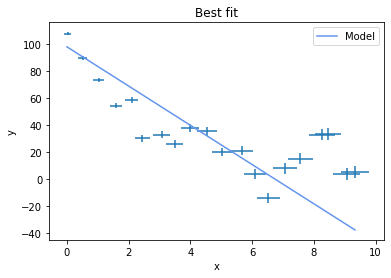

In [67]:
plt.errorbar(x,y,xerr=np.sqrt(xvar),yerr=np.sqrt(yvar),linestyle="")

xs = np.linspace(0,np.max(x),100)
ys = polynomial(fit2.beta, xs)
plt.plot(xs, ys, c="cornflowerblue", label="Model")
plt.title("Best fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

NormaltestResult(statistic=2.393962083699811, pvalue=0.3021048785736262)


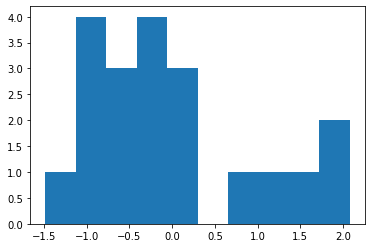

In [100]:
# Normalised Residuals
r = y - polynomial(fit2.beta, x)
r = r - np.mean(r)
r = r/np.std(r)
plt.hist(r)

print(sp.stats.normaltest(r))

# bootstrapping it

In [70]:
bs_params2, bs_predictions2 = implementation.bs_odr(polynomial,x,y,[100,-10],sx,sy)

100%|████████████████████████████████| 100/100 [00:00<00:00, 959.15it/s]


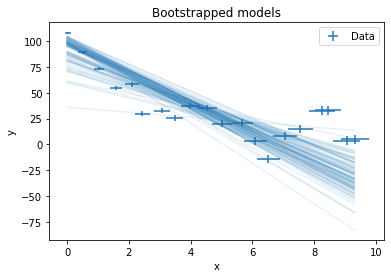

In [71]:
# Plot bootstrapped models
plt.errorbar(x, y, xerr=sx, yerr=sy, label="Data", linestyle="")
xs = np.arange(0,np.max(x),0.1)
for bs_param in bs_params2:
    ys = polynomial(bs_param, xs)
    plt.plot(xs,ys, color="C0", alpha=.1)
plt.title("Bootstrapped models")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Parameter  0 92.10911251157198  +/-  11.881691298331267


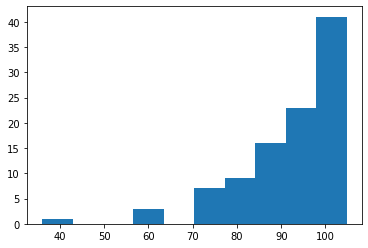

Parameter  1 -13.323566472450274  +/-  2.715166897498596


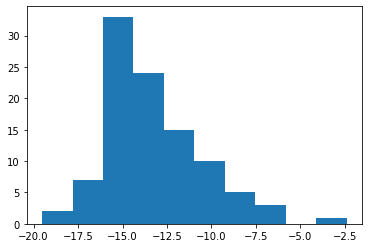

In [77]:
# Plot parameter estimate histograms
n_params = len(bs_params2[0])
for i in range(n_params):
    estimates = [p[i] for p in bs_params2]
    print("Parameter ", i, np.mean(estimates), " +/- ", np.std(estimates))
    plt.hist(estimates)
    plt.show()

11206.756813640732
622.5976007578184


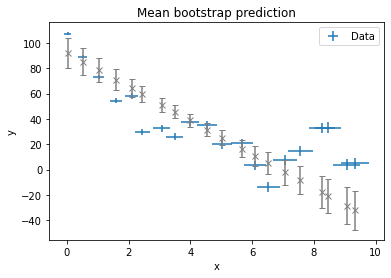

In [80]:
# Find bootstrap prediction for every x value and calculate SSE
plt.errorbar(x, y, xerr=sx, yerr=sy, label="Data", linestyle="")

SSE = 0
for i in range(len(x)):
    plt.errorbar(x[i], np.mean(bs_predictions2[i]), yerr=np.std(bs_predictions2[i]), \
                 c="0.5", marker="x", capsize=3)
    SSE += (y[i] - np.mean(bs_predictions2[i]))**2
plt.title("Mean bootstrap prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

print(SSE)
print(SSE/(len(x)-2))